<a href="https://colab.research.google.com/github/Rushikesh3005/Telecom-churn-analysis/blob/main/Telecom_Churn_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Orange S.A., formerly France Télécom S.A., is a French multinational telecommunications corporation. The Orange Telecom's Churn Dataset, consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription.

## <b> Explore and analyze the data to discover key factors responsible for customer churn and come up with ways/recommendations to ensure customer retention. </b>

#**Problem Statement:-**

##Exploring and analyzing the data to discover key factors responsible for customer churn and come up with ways/recommendations to ensure customer retention.

In [1]:
#Mounting google colab to Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#importing liabraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

In [3]:
#Importing dataframe to colab notebook
df=pd.read_csv('/content/drive/MyDrive/Copy of Telecom Churn.csv')

In [ ]:
df.head(10)  #10 head entries of the data

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
5,AL,118,510,Yes,No,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
6,MA,121,510,No,Yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False
7,MO,147,415,Yes,No,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False
8,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
9,WV,141,415,Yes,Yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False


In [5]:
df.tail(10) #last 10 entries of the data

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
3323,IN,117,415,No,No,0,118.4,126,20.13,249.3,97,21.19,227.0,56,10.22,13.6,3,3.67,5,True
3324,WV,159,415,No,No,0,169.8,114,28.87,197.7,105,16.80,193.7,82,8.72,11.6,4,3.13,1,False
3325,OH,78,408,No,No,0,193.4,99,32.88,116.9,88,9.94,243.3,109,10.95,9.3,4,2.51,2,False
3326,OH,96,415,No,No,0,106.6,128,18.12,284.8,87,24.21,178.9,92,8.05,14.9,7,4.02,1,False
3327,SC,79,415,No,No,0,134.7,98,22.90,189.7,68,16.12,221.4,128,9.96,11.8,5,3.19,2,False
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,No,Yes,25,234.4,113,39.85,265.9,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


##Data summury

In [6]:
df.info() #data information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [7]:
df.isnull().sum() # checking for null values present in dataset

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [8]:
df.describe(include="all") #data description

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
count,3333,3333.000000,3333.000000,3333,3333,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333
unique,51,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,WV,NaN,NaN,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,106,NaN,NaN,3010,2411,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2850
mean,NaN,101.064806,437.182418,NaN,NaN,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,NaN
std,NaN,39.822106,42.371290,NaN,NaN,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,NaN
min,NaN,1.000000,408.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,74.000000,408.000000,NaN,NaN,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,NaN
50%,NaN,101.000000,415.000000,NaN,NaN,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,NaN
75%,NaN,127.000000,510.000000,NaN,NaN,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,NaN


#To find out unique values in dataset

In [9]:
print ("\nUnique values :  \n",df.nunique()) # Number of unique values in each column


Unique values :  
 State                       51
Account length             212
Area code                    3
International plan           2
Voice mail plan              2
Number vmail messages       46
Total day minutes         1667
Total day calls            119
Total day charge          1667
Total eve minutes         1611
Total eve calls            123
Total eve charge          1440
Total night minutes       1591
Total night calls          120
Total night charge         933
Total intl minutes         162
Total intl calls            21
Total intl charge          162
Customer service calls      10
Churn                        2
dtype: int64


##Find out Numerical and categorical feature in dataset

In [10]:
#numerical features in dataset
numerical_features=[feature for feature in df.columns if df[feature].dtype !="O" and df[feature].dtype !="bool"]
numerical_features

['Account length',
 'Area code',
 'Number vmail messages',
 'Total day minutes',
 'Total day calls',
 'Total day charge',
 'Total eve minutes',
 'Total eve calls',
 'Total eve charge',
 'Total night minutes',
 'Total night calls',
 'Total night charge',
 'Total intl minutes',
 'Total intl calls',
 'Total intl charge',
 'Customer service calls']

In [11]:
#Categorical features in dataset 
catg_features=[feature for feature in df.columns if df[feature].dtype =="O" or df[feature].dtype =="bool"]
catg_features

['State', 'International plan', 'Voice mail plan', 'Churn']

###Given data is cleaned data no amy null values or wrong entries present in data so no need of data cleaning.

#Data Behaviour

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


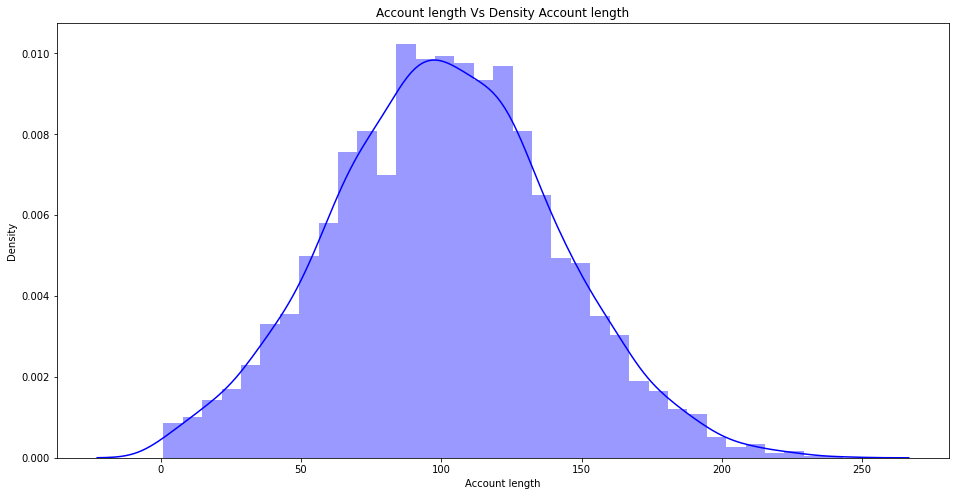

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


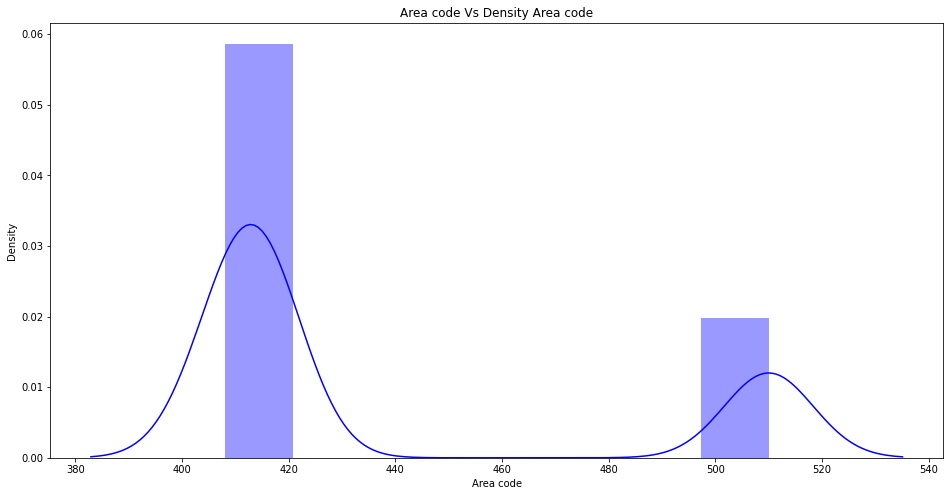

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


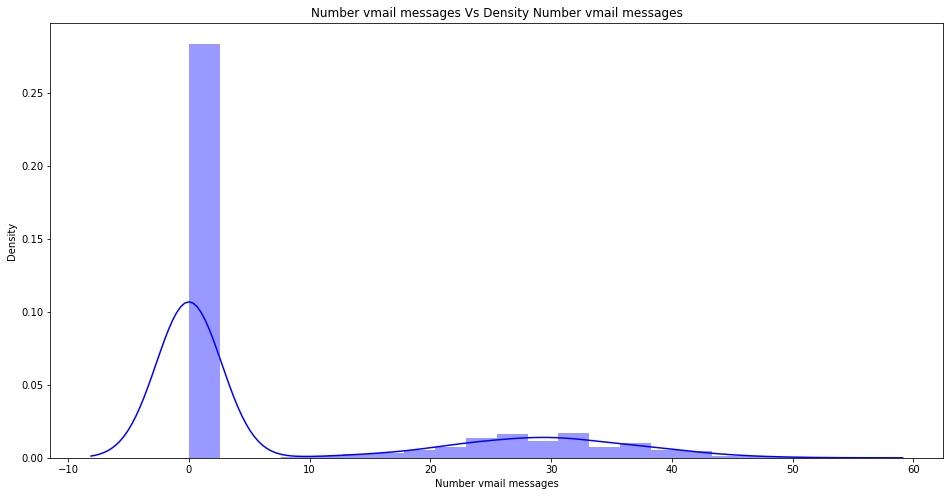

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


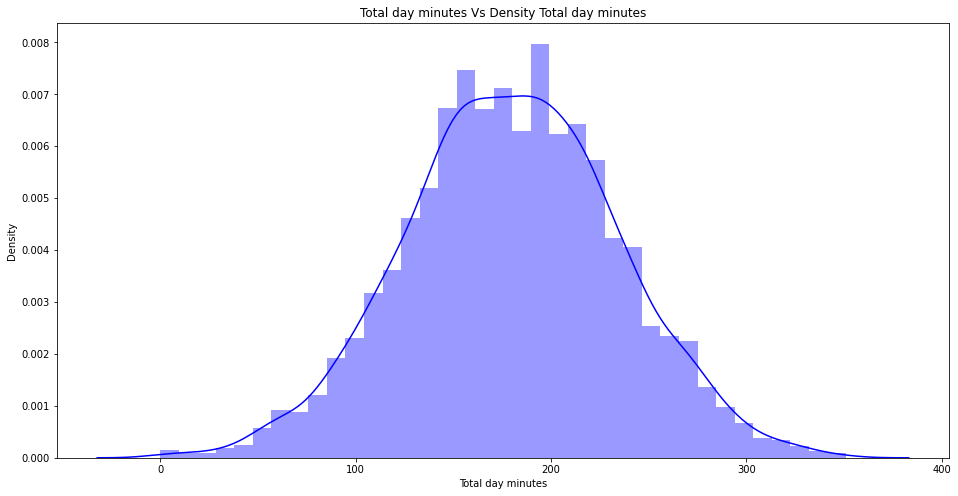

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


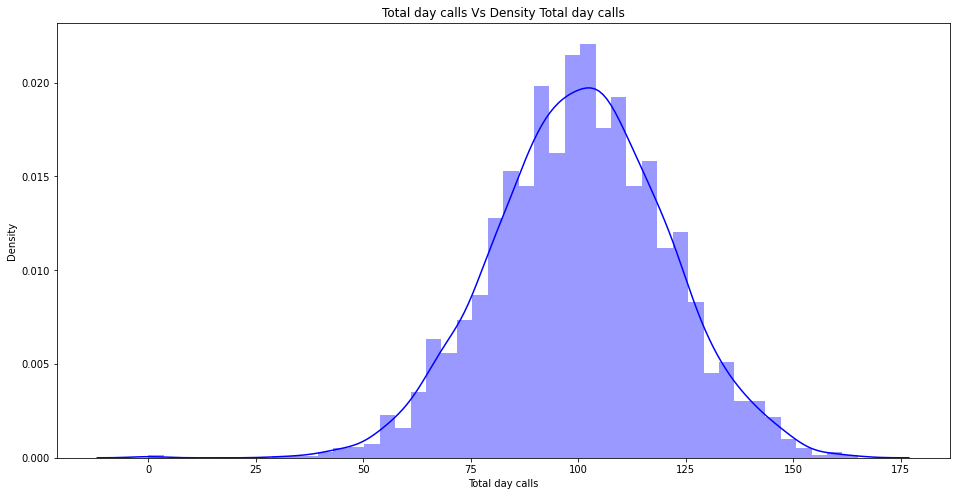

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


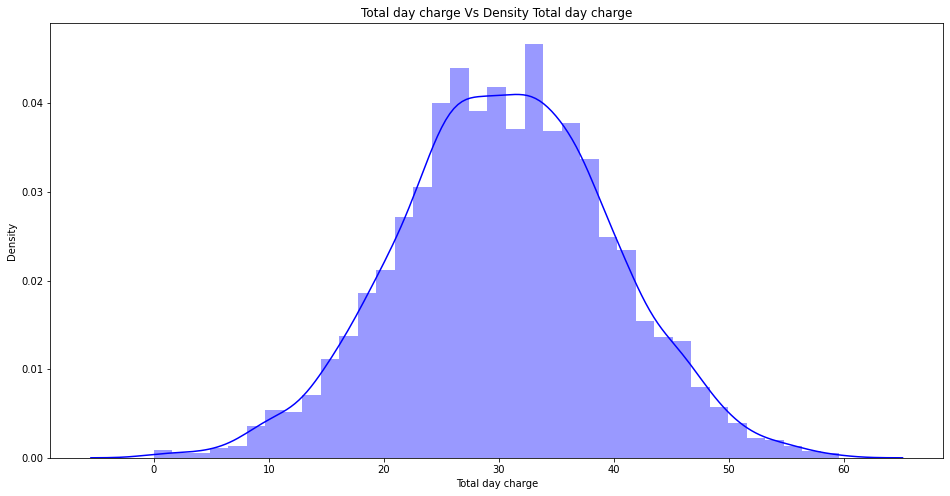

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


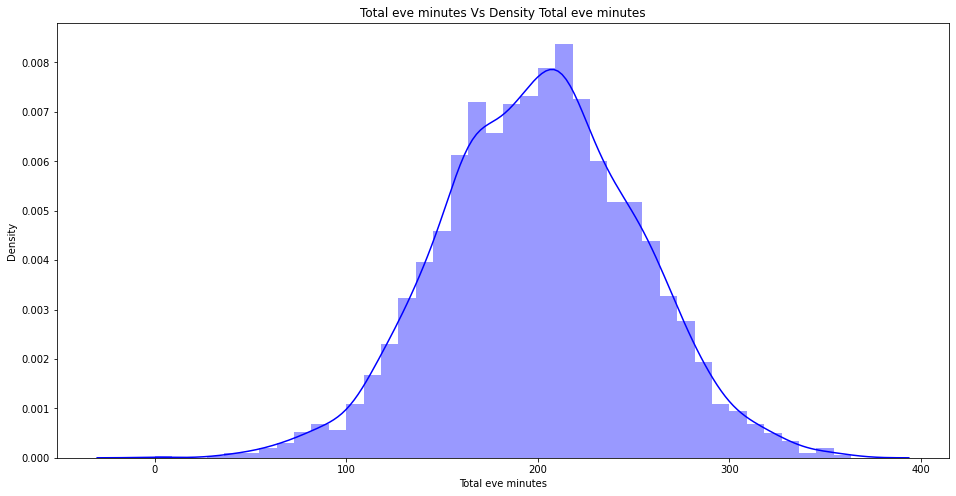

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


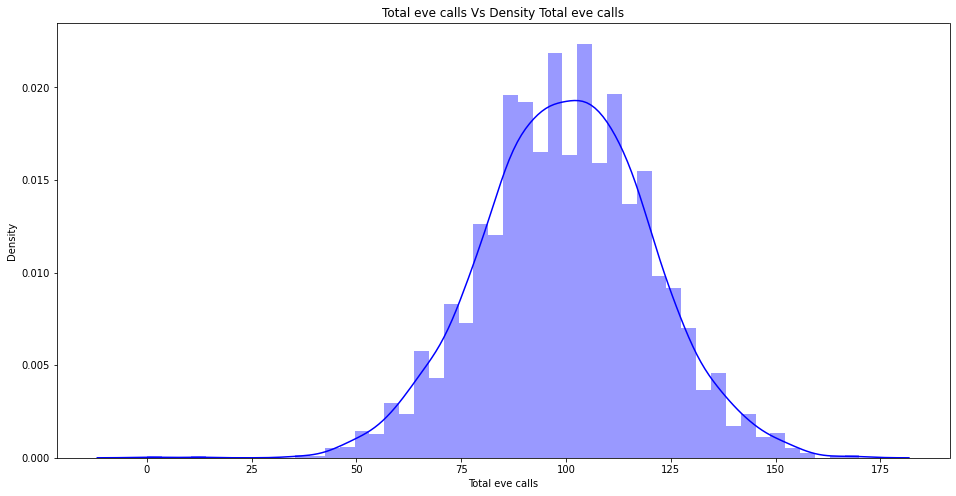

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


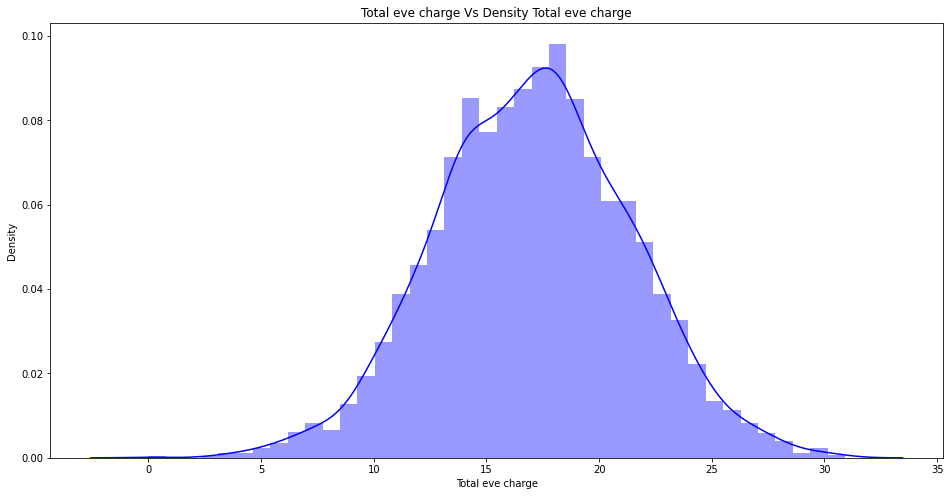

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


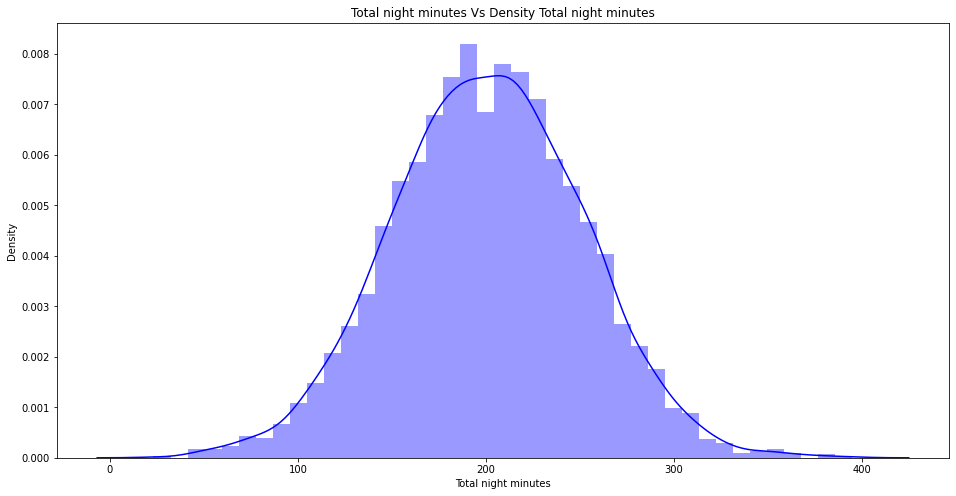

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


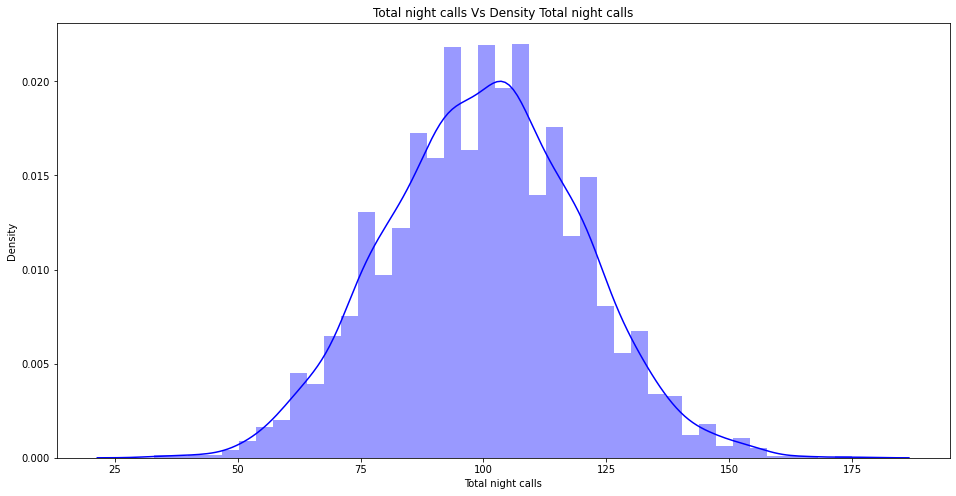

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


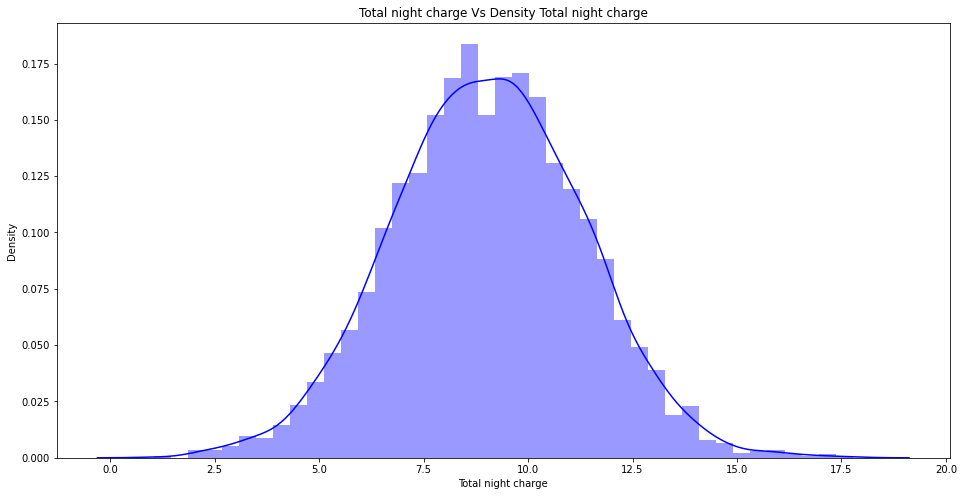

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


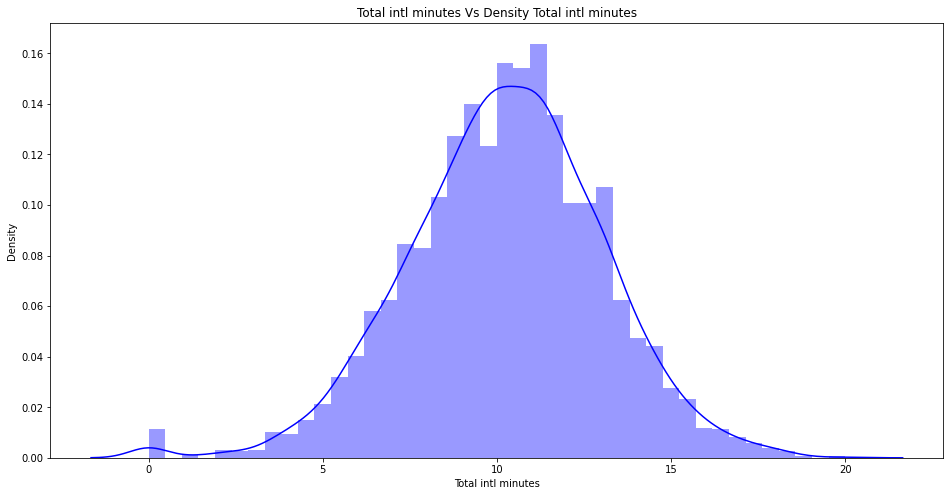

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


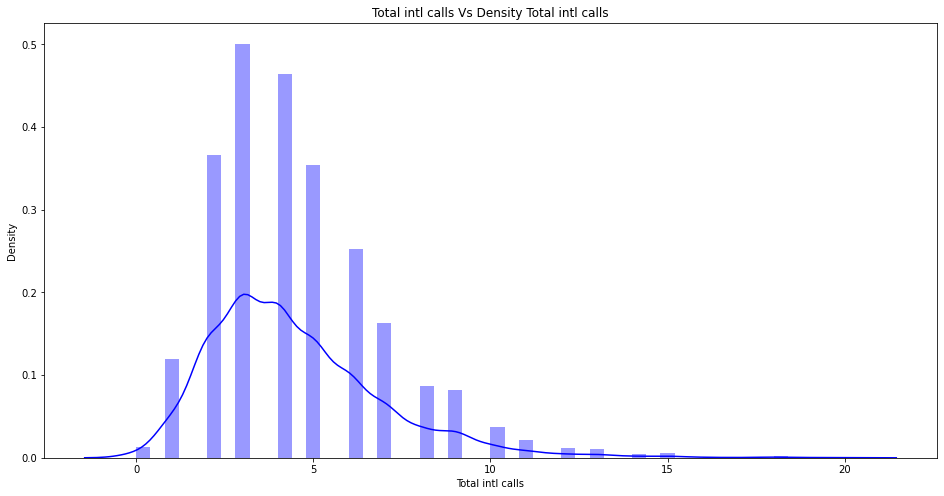

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


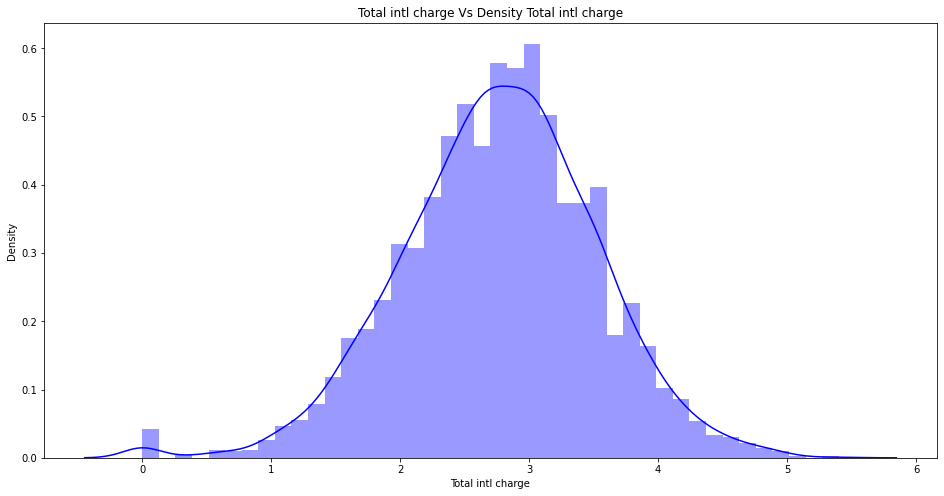

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


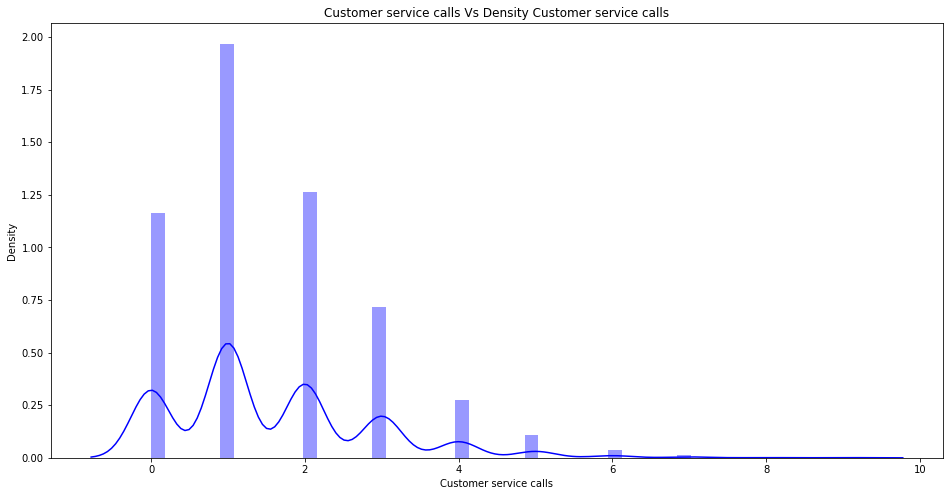

In [12]:
#Distribution of Numeric variables
for i in numerical_features:
  plt.figure(figsize=(16,8))
  sns.distplot(df[i],color="b")
  plt.title(i+" Vs"+" Density "+i)
  plt.show()

##Checking for distribution of total minutes spend in day, evening and in night

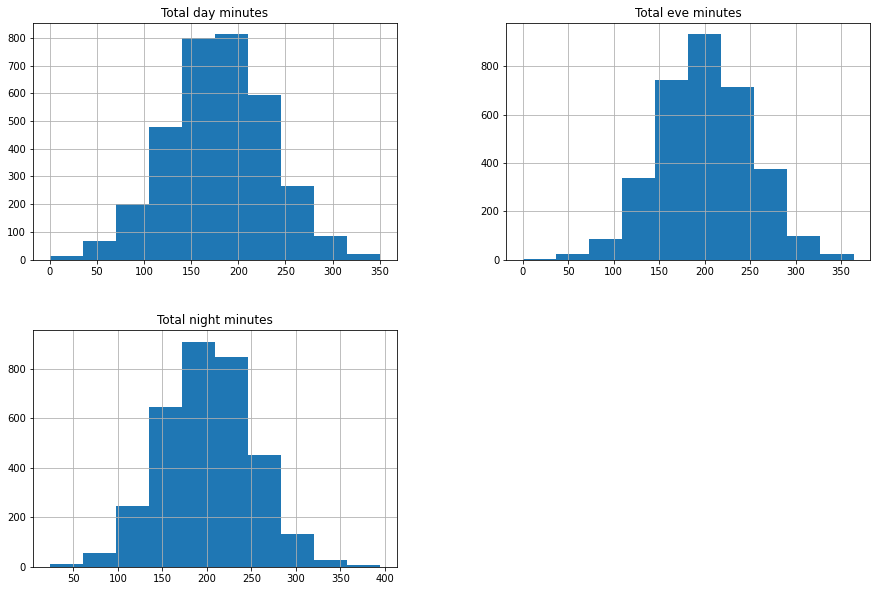

In [13]:
features = ['Total day minutes', 'Total eve minutes','Total night minutes'] #Creating list of columns to be used
df[features].hist(figsize=(15,10)); #showing distribution by histogram

##KDEPLOT for some continuous features for churned and non churned data

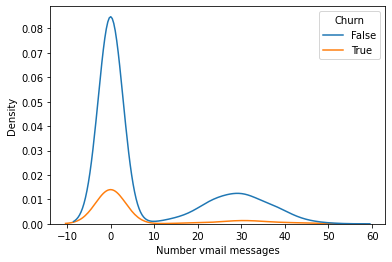

In [14]:
sns.kdeplot(data=df, x="Number vmail messages", hue="Churn") #Number Vmail message vs Density

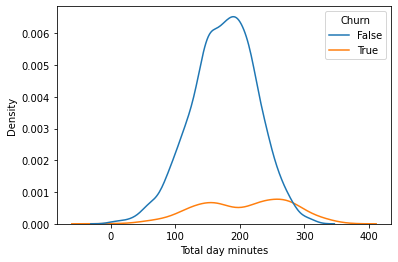

In [15]:
sns.kdeplot(data=df, x="Total day minutes", hue="Churn")   #Total day minutes vs Density

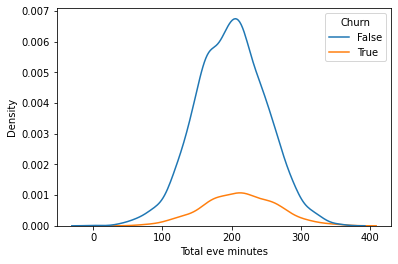

In [16]:
sns.kdeplot(data=df, x="Total eve minutes", hue="Churn")    #Total evening minutes vs Density

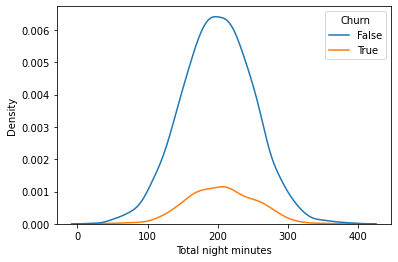

In [17]:
sns.kdeplot(data=df, x="Total night minutes", hue="Churn")   #Total night minutes vs Density

#Data Analysis And Visualization

## To find the number of churners and non-churners in the dataset

In [18]:
# Churners vs Non-Churners
df['Churn'].value_counts()

False    2850
True      483
Name: Churn, dtype: int64

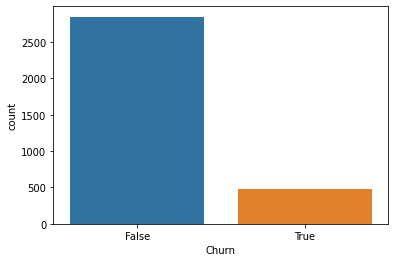

In [19]:
sns.countplot(x='Churn', data = df) #Graph showing churn vs count

##Impact of customer service calls on Churn

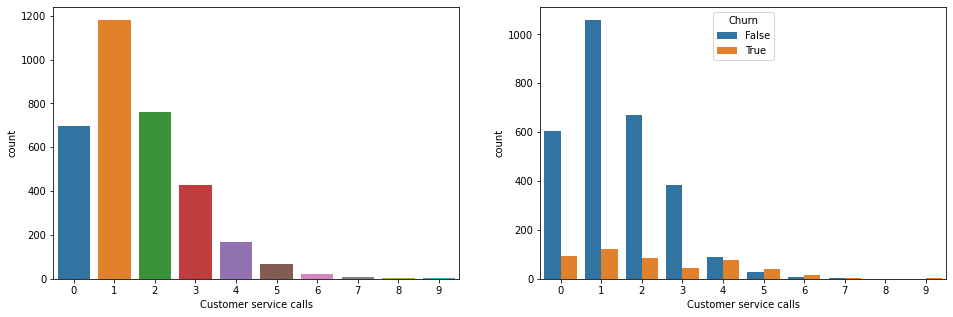

In [20]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,5))
 
sns.countplot(x='Customer service calls', data = df, ax = axes[0]);#Graph showing customer service calls  vs count 
sns.countplot(x='Customer service calls', hue='Churn', data=df,ax = axes[1]);#Graph showing customer service calls  vs count w.r.t churn or nonchurn data

As customer increases customer service calls might they are not satisfying with the solution given by by the resolution of the problem so customers frustrate and getting churn in this case while Some customers are lazy and hence without resolving the issue they have jumped to other network operator,while the customers who have called once also have high churn rate indicating their issue was not solved in first attempt

Company should give promise that We will probably resolve your problem in first attempt if not possible then politely take some time and resolve that problem in that time so customer will stay with company.

##To group data by Churn and compute the mean to find out if churners make more customer service calls or non churners

In [21]:
# Group data by 'Churn' and compute the mean
print(df.groupby('Churn')['Customer service calls'].mean())

Churn
False    1.449825
True     2.229814
Name: Customer service calls, dtype: float64


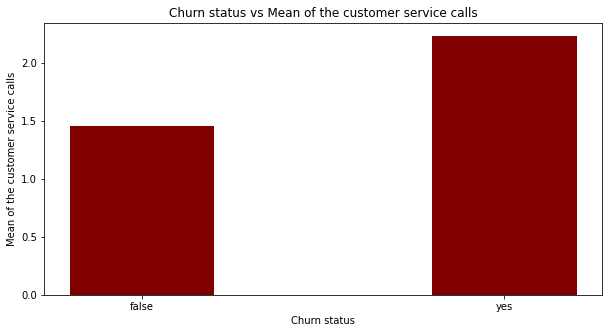

In [22]:
churn = ["false","yes"]
values = [1.449825,2.229814]
  
fig = plt.figure(figsize = (10, 5)) #graph size setting
 
# creating the bar plot
plt.bar(churn, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("Churn status")
plt.ylabel("Mean of the customer service calls")
plt.title("Churn status vs Mean of the customer service calls")
plt.show() #showing barplot

##Churn and non churn data w.r.t International plan

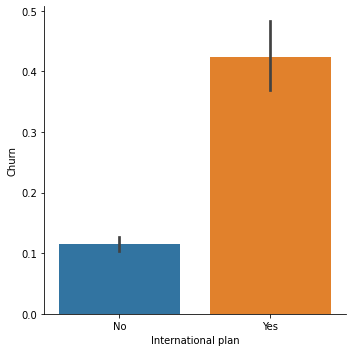

In [23]:
sns.catplot(data=df, x="International plan", y="Churn", kind="bar") #seaborn liabrary to show International plan vs Churn data

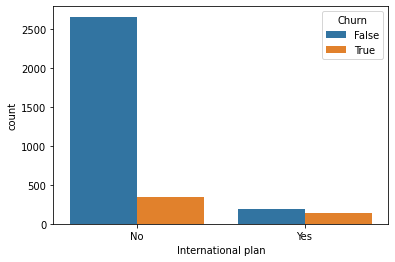

In [24]:
sns.countplot( x="International plan", hue='Churn', data=df)   #International plan vs Churn and non churned data using two bar plots

##Churn and non churn data w.r.t Voice mail plan

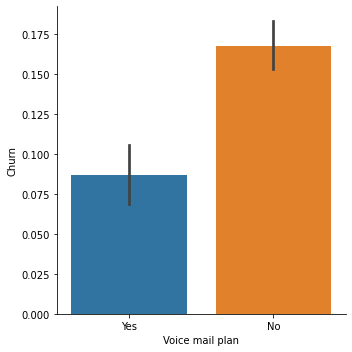

In [25]:
sns.catplot(data=df, x="Voice mail plan", y="Churn", kind="bar") #seaborn liabrary to show Voice mail plan vs Churn data

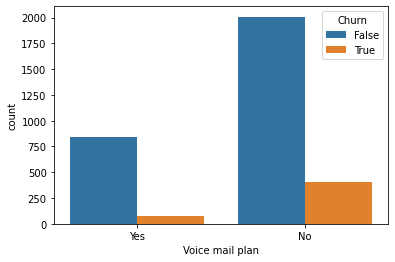

In [26]:
sns.countplot(x='Voice mail plan', hue='Churn', data=df)  #Voice mail plan vs Churn and non churned data using two bar plots

##Checking for some correlation

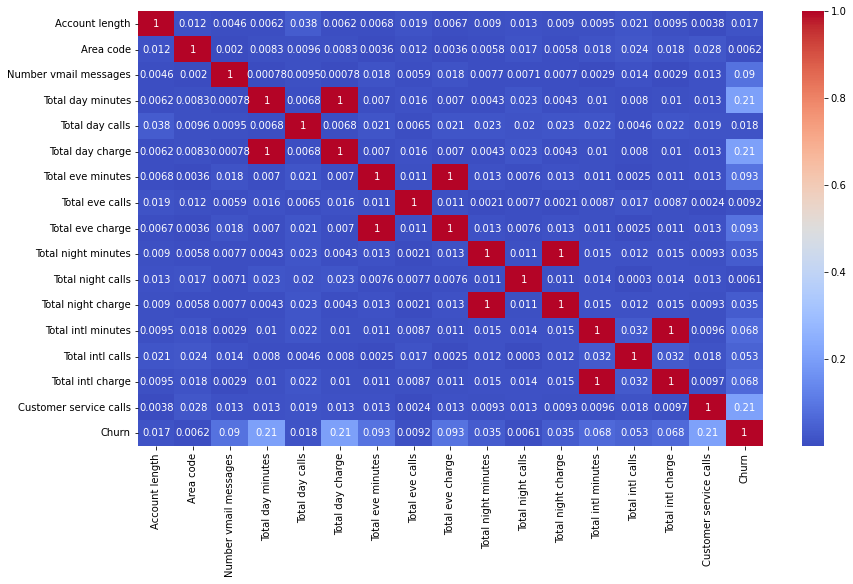

In [27]:
# checking correlation using heatmap
#Loading dataset
plt.figure(figsize=(14,8))
correlation=df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

IndexError: ignored

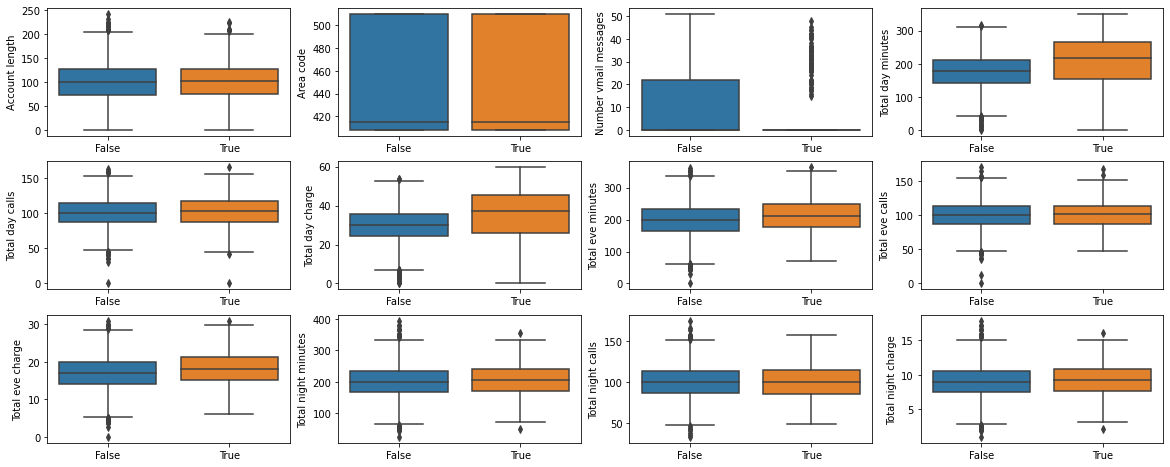

In [28]:
# sometimes we can analyse an ordinal variables just as numerical one
#numerical_features.remove('Area code')

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20,8))
for idx, feat in enumerate(numerical_features):
    ax = axes[int(idx / 4), idx % 4]
    sns.boxplot(x='Churn', y = feat, data=df, ax=ax)
    ax.set_xlabel('')
    ax.set_ylabel(feat)
fig.tight_layout();

From the above charts, we can notice that there is a lot of discrepancy in distribution between the two groups is for three variables, 'total day minutes', 'cusotmer service calls' and 'number vmail messages

##Churned and nonchurned data in specific Areas using their area codes

In [29]:
#creating new dataset with Area code and count of churned and non churn data for respective area code
df1=pd.DataFrame(df.groupby(['Area code','Churn'])['Churn'].count().reset_index(name='Churn_counts')) 

In [30]:
df1 # showing new dataset

,Area code,Churn,Churn_counts
0,408,False,716
1,408,True,122
2,415,False,1419
3,415,True,236
4,510,False,715
5,510,True,125


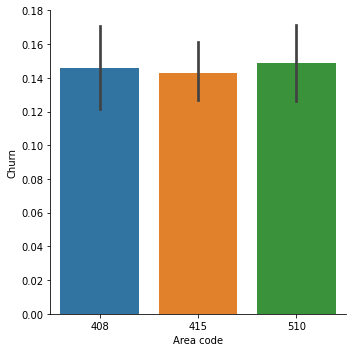

In [31]:
sns.catplot(data=df, x="Area code", y="Churn", kind="bar") #Count of entries in churn column w.r,t Area code

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


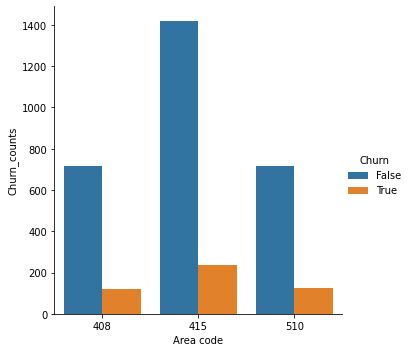

In [32]:
sns.factorplot(x='Area code', y='Churn_counts', hue='Churn', data=df1, kind='bar') #Count of Churned and non churned data for respective area code

#**Conclusion:-**

1.After checking null values and data summary it shows that the given dataset is cleaned dataset.

2.After analysis of the data it is conclude that the as customer service call getting increases the percentage of that account getting churned is increases  So Company should give promise that We will probably resolve your problem in first attempt if not possible then politely take some time and resolve that problem in that time so customer will stay with company.

3.The customer having International plans are getting churned as compared to the customers having no international plan so it might be due to high charges on international calls so company should try to minimise the international calls charges. 

4.There is no any strong relationship between output data i.e churn and other features.

5.The given data shows that the behaviour of the Numerical features is tends to a normal distribution.

6.The given dataset for area code is balanced for all three areas and percentage of churned data over non churn is almost same for all three area codes.



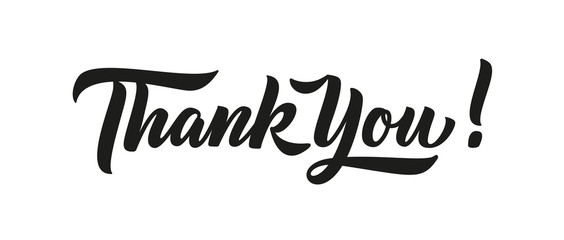